## 이미지 데이터 로딩

In [1]:
from tensorflow.keras.datasets import mnist # mnist module.load_data()

# 튜플 형식으로 반환 (0,1),(0,1)
(train_image, train_labels),(test_image, test_labels)=mnist.load_data()

### 데이터 구조 확인

In [2]:
# 학습 데이터 / 학습 데이터의 답
train_image.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
# 첫번째 이미지
print(train_labels[0]) # 첫번째 이미지의 답
train_image[0] # 5라는 숫자 이미지

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 신경망 생성 : 모델 생성

In [4]:
from tensorflow import keras # keras module (변수, 함수, 클래스 존재)
from tensorflow.keras import layers

model = keras.Sequential([ # Sequential = 순차적 처리 => forward (자동 미분)
    layers.Dense(512, activation='relu') # 밀집층 생성, 784=>512, 차원축소, 특성 추출, relu=비선형 함수
    , layers.Dense(512, activation='relu') # 학습을 활성화
    , layers.Dense(10) # 출력층
])

In [5]:
# loss function(오차구하는 함수), optimizer(역전파 - 미분,학습), metric(평가지표)
model.compile(
      optimizer='adam'
    , loss='sparse_categorical_crossentropy'
    , metrics=['accuracy'] # 여러 개가 들어갈수 있어서 리스트, 정확도만 확인
)
# 신경망 완성

In [6]:
test_image.shape

(10000, 28, 28)

In [7]:
# 학습 데이터 준비(60000,28,28) : 2차원 (28X28) => 1차원 변경 필요 (784)
train_image=train_image.reshape(60000,28*28)
# 0 ~ 1 사이 값으로 변환
train_image=train_image.astype('float32')/255 # GPU 연산은 float16이 제일 빠름

# 테스트 데이터 동일 처리(10000, 28, 28)
test_image=test_image.reshape(10000,28*28)
# 0 ~ 1 사이 값으로 변환
test_image=test_image.astype('float')/255

## 학습 진행

In [8]:
model.fit(
      train_image      # 학습 데이터
    , train_labels     # 학습 데이터의 답
    , epochs=5         # 전체 데이터에 대한 반복 학습 횟수
    , batch_size=128   # 한번 학습(미분)시 사용할 데이터 포인트 개수, 한개씩하면 속도 느려짐 + 이상치 민감해짐
)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 2.3577 - accuracy: 0.1916
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1834
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1834
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1834
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1834


In [9]:
60000/128

468.75

In [21]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2571 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1039 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9887


## 검증

In [11]:
# 테스트 이미지 10개 가지고 와서 
test_digits=test_image[:10]

# 모델에 집어넣어서 예측값(10개) / 1개의 예측값에는 10개 출력 
predictions=model.predict(test_digits)
print(predictions[0]) # 10개 결과 출력

# => argmax
print(predictions[0].argmax()) # 최대값을 가지고 있는 인덱스 반환

# 테스트 이미지 원래답 10개와 비교


1/1 [==============================] - 0s 80ms/step
[6.3865443e-08 1.9853843e-08 8.6293239e-06 2.3192025e-04 1.6007544e-11
 2.1848550e-07 6.6805277e-12 9.9975473e-01 1.5958399e-06 2.7601345e-06]
7


In [14]:
# 모델 평가 시 => evaluate 는 오차와 정확도가 출력됨!
test_loss, test_acc = model.evaluate(test_image, test_labels) #테스트이미지(10000개), 답

print(f'테스트 이미지에 대한 모델 정확도 : {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9801
테스트 이미지에 대한 모델 정확도 : 0.9800999760627747


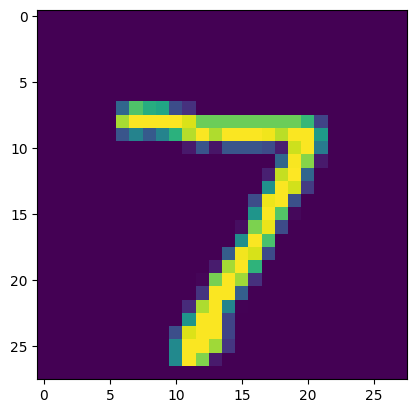

In [12]:
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[0])
plt.show()


313/313 [==============================] - 1s 2ms/step
테스트 이미지 예측값 : 5
원래답 : 5


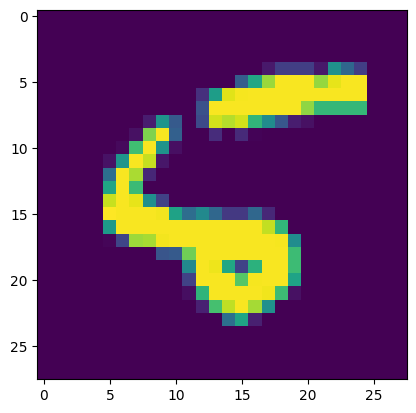

In [20]:
predictions = model.predict(test_image)
idx = 8
print(f'테스트 이미지 예측값 : {predictions[idx].argmax()}')
print(f'원래답 : {test_labels[idx]}')

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[idx])
plt.show()


In [28]:
import pandas as pd

# 예측값 == 원래값  => boolean 출력
predictions = model.predict(test_images) # 예측값
predict_value = [pred.argmax() for pred in predictions]

# 결과 저장 데이터 프레임 생성
result_df = pd.DataFrame({
    '예측값' :predict_value,
    '원래값' : test_labels
}
)

result_df.head()


313/313 [==============================] - 1s 2ms/step


,예측값,원래값
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
# 학습 이미지의 차원 확인
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [10]:
train_images.dtype
# => uint8 ( unsigned 8비트 ) => 픽셀당 0~255개의 정수 존재
# cpu => 정수 연산이 빠름
# gpu => 실수 연산이 빠르므로 float 로 변경 하는 것이 연산시 유리!

dtype('uint8')

In [11]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

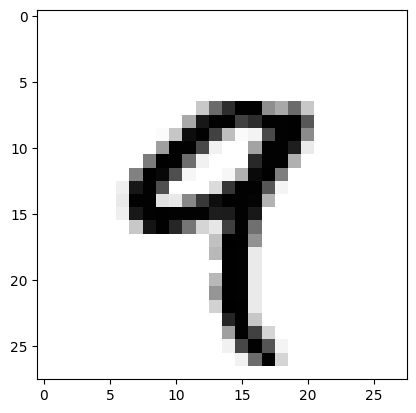

In [12]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
# 답
train_labels[4]

9

In [15]:
my_slice = train_images[10:100] # 10 ~ 99까지 색인 => 90개의 이미지 색인
my_slice.shape

(90, 28, 28)

In [16]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:] # =>전체 사진 출력/  4분의 1 크기의 데이터만 출력하는 것

In [17]:
my_slice = train_images[4, 14:, 14:] # => 인덱스 4의 사진 한장을 4분의 1 크기로 출력하는 것!

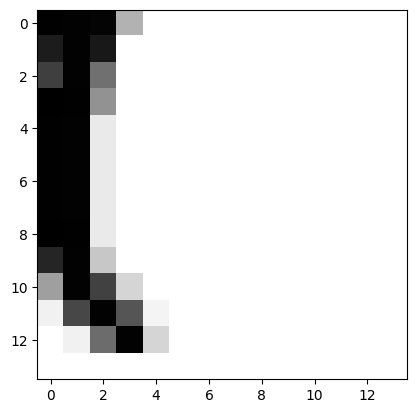

In [19]:
# 이미지 파일을 슬라이싱 하여 특정 부위의 데이터 출력
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

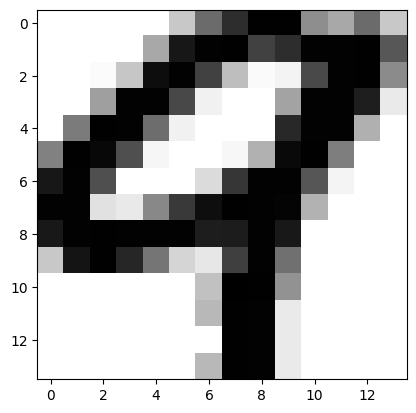

In [21]:
# 마이너스 인덱스
my_slice = train_images[4, 7:-7, 7:-7] # 중간 위치 데이터 출력
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [22]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


In [23]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x


In [31]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time() # 연산 시작 시간 저장
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.) # ==> 이게 relu 와 동일 기능!
print("걸린 시간: {0:.6f} s".format(time.time() - t0))


걸린 시간: 0.003940 s


In [32]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.6f} s".format(time.time() - t0))

## ===> ndarray 가 for 문 동작보다 500배 빠름을 알 수 있음!

걸린 시간: 1.574091 s
